In [1]:
import os
os.chdir('../../')
print(os.getcwd())

import joblib
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

c:\Users\Joe\Desktop\Term-2\Data_Science\DS_CW_2


In [2]:
log_reg = joblib.load('outputs/models/log_reg.pkl')
nn_num = load_model('outputs/models/nn_numeric_input.h5')

df_test = pd.read_csv('data/clean/clean_data_test.csv', index_col=False)

In [3]:
numerical_features = ['team1_Ranking', 'team2_Ranking']
for i in range(10):
    numerical_features.append(f'player{i}_rating')
    numerical_features.append(f'player{i}_kd')


X_test = df_test[numerical_features]
y_test = df_test['team_1_won']

In [4]:
log_reg_preds = log_reg.predict_proba(X_test)[:,1]
nn_preds = nn_num.predict(X_test)
nn_probs = (np.exp(nn_preds)/(1+np.exp(nn_preds))).squeeze()

2/2 [==============================] - 1s 2ms/step


In [5]:
weights = np.linspace(0, 1, 1001)

Accuracies = []
CrossEntropyScores = []

for w in weights:
    probs = w*log_reg_preds + (1-w)*nn_probs

    Accuracies.append(np.mean((probs>0.5) == y_test))
    CrossEntropyScores.append(log_loss(y_test, probs))


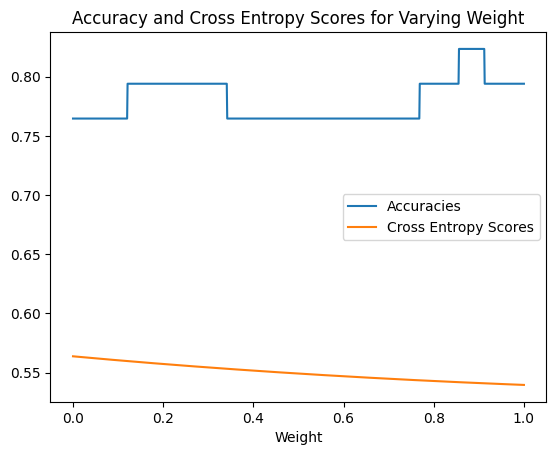

In [6]:
plt.plot(weights, Accuracies, label = 'Accuracies')
plt.plot(weights, CrossEntropyScores, label = 'Cross Entropy Scores')
plt.title('Accuracy and Cross Entropy Scores for Varying Weight')
plt.xlabel('Weight')
plt.legend()